In [1]:
import astropy.units as u
import numpy as np
from astroquery.simbad import Simbad
import astropy.coordinates as coord

from astropy.io import ascii
from astropy.io import fits
import os.path
# 
import elk
from elk.ensemble import EnsembleLC
from elk.lightcurve import BasicLightcurve

from astropy.table import Table, join, MaskedColumn, vstack, Column
from matplotlib import pyplot as plt


path = '/uufs/chpc.utah.edu/common/home/astro/zasowski/sinha/fits/'
plt.style.use(path +'paper_style.mplstyle')
plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['text.usetex'] = True

In [2]:
cluster_summary_stats = Table.read('cluster_summary_statistics.fits')
cluster_summary_stats = cluster_summary_stats[cluster_summary_stats['n_rows'] > 2]
cluster_summary_stats

cluster_name,summary_fname,n_rows,snr_05,snr_25,snr_34,snr_50,snr_68,snr_75,snr_95,rms_05,rms_25,rms_34,rms_50,rms_68,rms_75,rms_95,std_05,std_25,std_34,std_50,std_68,std_75,std_95,MAD_05,MAD_25,MAD_34,MAD_50,MAD_68,MAD_75,MAD_95,sigmaG_05,sigmaG_25,sigmaG_34,sigmaG_50,sigmaG_68,sigmaG_75,sigmaG_95,skewness_05,skewness_25,skewness_34,skewness_50,skewness_68,skewness_75,skewness_95,von_neumann_ratio_05,von_neumann_ratio_25,von_neumann_ratio_34,von_neumann_ratio_50,von_neumann_ratio_68,von_neumann_ratio_75,von_neumann_ratio_95,J_Stetson_05,J_Stetson_25,J_Stetson_34,J_Stetson_50,J_Stetson_68,J_Stetson_75,J_Stetson_95,max_power_05,max_power_25,max_power_34,max_power_50,max_power_68,max_power_75,max_power_95,freq_at_max_power_05,freq_at_max_power_25,freq_at_max_power_34,freq_at_max_power_50,freq_at_max_power_68,freq_at_max_power_75,freq_at_max_power_95,n_peaks_05,n_peaks_25,n_peaks_34,n_peaks_50,n_peaks_68,n_peaks_75,n_peaks_95,ratio_of_power_at_high_v_low_freq_05,ratio_of_power_at_high_v_low_freq_25,ratio_of_power_at_high_v_low_freq_34,ratio_of_power_at_high_v_low_freq_50,ratio_of_power_at_high_v_low_freq_68,ratio_of_power_at_high_v_low_freq_75,ratio_of_power_at_high_v_low_freq_95,FAP_05,FAP_25,FAP_34,FAP_50,FAP_68,FAP_75,FAP_95,max_autocorrelation_05,max_autocorrelation_25,max_autocorrelation_34,max_autocorrelation_50,max_autocorrelation_68,max_autocorrelation_75,max_autocorrelation_95,time_of_max_autocorrelation_05,time_of_max_autocorrelation_25,time_of_max_autocorrelation_34,time_of_max_autocorrelation_50,time_of_max_autocorrelation_68,time_of_max_autocorrelation_75,time_of_max_autocorrelation_95,WARN
bytes47,bytes17,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
hlsp_elk_tess_ffi_ascc-116_tess_v1_llc,ASCC 116,9,4.210312158888359,4.220871647165675,4.233931671624261,4.240398016208685,4.427576222399078,4.659685276475027,4.675455192440774,0.11922095350424355,0.11922095350424355,0.13896526098785933,0.14664360278704325,0.17916963834174784,0.19976972570948479,0.2008426791196614,0.0006328994714575115,0.0006644176098164822,0.0006753425367053019,0.0007037110142785061,0.0007151433809493852,0.0007211664100315057,0.0008122389767306716,0.0004034937630646329,0.00046387751830445634,0.0004782207758422219,0.0004923961884941708,0.000504305106985834,0.0005096196972631528,0.0005725268842575515,0.0006001927287424714,0.0006895930986941546,0.0007090747358860458,0.0007288808474186777,0.0007498191859792313,0.0007581550736853656,0.0008519769683606058,-438816055.9819275,-109307710.3800295,-104581472.62106614,548805525.8794718,833781704.4876144,840503982.6001179,1496749331.083393,0.0004427338452732996,0.0004978440613148311,0.0006755498524824901,0.000987749200974715,0.001929492776758831,0.003090723742556587,0.006335437849983838,9.542679690721785,10.797304415513048,10.974113980542421,11.270533026551854,16.6868113573833,23.342707146886017,25.06284036695987,0.05841770542642878,0.06470171731254237,0.08750295498875331,0.09995361056222787,0.23767733119492132,0.2620612798522036,0.2915478127438043,0.24600000000000002,0.29000000000000004,0.29000000000000004,0.29000000000000004,0.3844000000000001,0.39000000000000007,0.43600000000000005,5.4,7.0,9.16,12.0,15.440000000000001,16.0,

In [3]:
age_path = '/uufs/chpc.utah.edu/common/home/astro/zasowski/sinha/tess_data/data/'

mw=Table.read(age_path + 'Use_MW.fits')

smc=Table.read(age_path + 'Bica_Cut_down.fits')

lmc=Table.read(age_path + 'Glatt_Cut_down.fits')


In [4]:
ages=[]
location = []
for name in list(cluster_summary_stats['summary_fname']):
    for i in range(len(mw)):
        if mw[i]['NAME']== name:
            ages.append(mw[i]['LOG_AGE'])
            location.append('MW')
    
    for j in range(len(smc)):
        if smc[j]['SimbadName']==name:
            ages.append(smc[j]['logAge'])
            location.append('SMC')
            
    for k in range(len(lmc)):
        if lmc[k]['SimbadName']==name:
            ages.append(lmc[k]['Age'])
            location.append('LMC')
        
cluster_summary_stats['age'] = ages
cluster_summary_stats['location'] = location

cluster_summary_stats.colnames

['cluster_name',
 'summary_fname',
 'n_rows',
 'snr_05',
 'snr_25',
 'snr_34',
 'snr_50',
 'snr_68',
 'snr_75',
 'snr_95',
 'rms_05',
 'rms_25',
 'rms_34',
 'rms_50',
 'rms_68',
 'rms_75',
 'rms_95',
 'std_05',
 'std_25',
 'std_34',
 'std_50',
 'std_68',
 'std_75',
 'std_95',
 'MAD_05',
 'MAD_25',
 'MAD_34',
 'MAD_50',
 'MAD_68',
 'MAD_75',
 'MAD_95',
 'sigmaG_05',
 'sigmaG_25',
 'sigmaG_34',
 'sigmaG_50',
 'sigmaG_68',
 'sigmaG_75',
 'sigmaG_95',
 'skewness_05',
 'skewness_25',
 'skewness_34',
 'skewness_50',
 'skewness_68',
 'skewness_75',
 'skewness_95',
 'von_neumann_ratio_05',
 'von_neumann_ratio_25',
 'von_neumann_ratio_34',
 'von_neumann_ratio_50',
 'von_neumann_ratio_68',
 'von_neumann_ratio_75',
 'von_neumann_ratio_95',
 'J_Stetson_05',
 'J_Stetson_25',
 'J_Stetson_34',
 'J_Stetson_50',
 'J_Stetson_68',
 'J_Stetson_75',
 'J_Stetson_95',
 'max_power_05',
 'max_power_25',
 'max_power_34',
 'max_power_50',
 'max_power_68',
 'max_power_75',
 'max_power_95',
 'freq_at_max_power_05'

In [5]:
stats = ['rms','std','MAD','sigmaG','von_neumann_ratio','J_Stetson','max_power','freq_at_max_power','n_peaks','ratio_of_power_at_high_v_low_freq'
         ,'FAP','max_autocorrelation','time_of_max_autocorrelation']

len(stats)

13

# ALL CLUSTERS

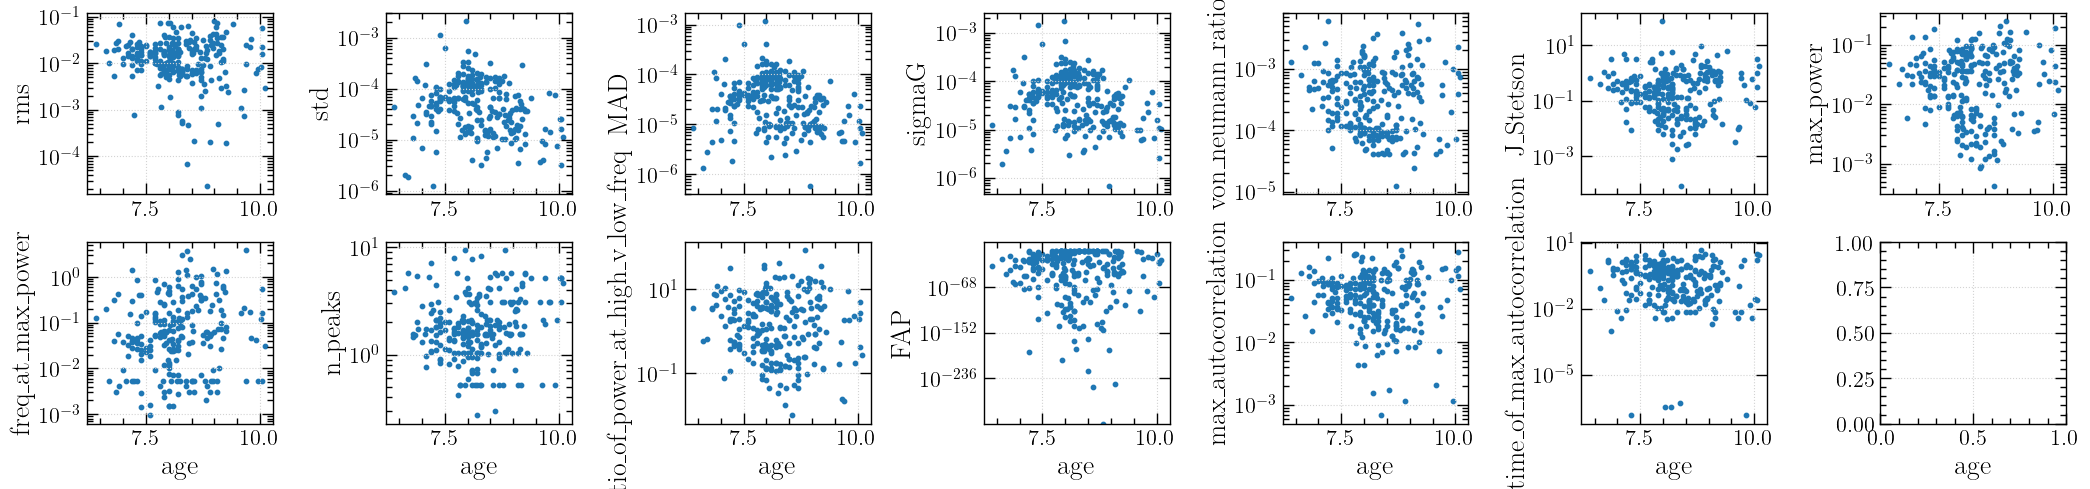

In [6]:
row = 0
col = 0
fig,ax = plt.subplots(2,7,figsize=(21,5))
for i in stats:
    ax[row][col].scatter(cluster_summary_stats['age'],(cluster_summary_stats['{}_95'.format(i)] - cluster_summary_stats['{}_05'.format(i)]) / np.sqrt(cluster_summary_stats['n_rows']),s=10)
    # ax[col].axhline(y=0.3)
    ax[row][col].set_yscale('log')
    ax[row][col].set_ylabel(i,fontsize=20)
    ax[1][col].set_xlabel('age',fontsize=20)
    col +=1

    if col == 7:
        row +=1
        col = 0
plt.tight_layout()

In [13]:
#don;t use skewness
rms_spread = (cluster_summary_stats['rms_95'] - cluster_summary_stats['rms_05']) / np.sqrt(cluster_summary_stats['n_rows'])
truth = rms_spread < np.nanmedian(cluster_summary_stats['rms_95']) - np.nanmedian(cluster_summary_stats['rms_05'])

subset_cols = ['std','max_power','freq_at_max_power','max_autocorrelation','time_of_max_autocorrelation','J_Stetson']

for i in subset_cols:
    spread = (cluster_summary_stats['{}_95'.format(i)] - cluster_summary_stats['{}_05'.format(i)]) / np.sqrt(cluster_summary_stats['n_rows'])

    med = np.nanmedian(cluster_summary_stats['{}_95'.format(i)]- cluster_summary_stats['{}_05'.format(i)])/np.sqrt(cluster_summary_stats['n_rows'])
    std = np.nanstd(cluster_summary_stats['{}_95'.format(i)]- cluster_summary_stats['{}_05'.format(i)])/np.sqrt(cluster_summary_stats['n_rows'])
    
    col_truth = spread < med + std
    truth = truth & col_truth


cluster_summary_stats['gold'] = truth

bad_clusters_charlie = ['NGC1704','[SL63] 410','NGC1932',
                        '[SL63] 106','NGC 129','IC 2581',
                        '[SL63] 763','BSDL1674','NGC2000']

bad_cluster_truth = np.isin(list(cluster_summary_stats['summary_fname']),bad_clusters_charlie)
cluster_summary_stats['gold'] = cluster_summary_stats['gold'] & (bad_cluster_truth==False)

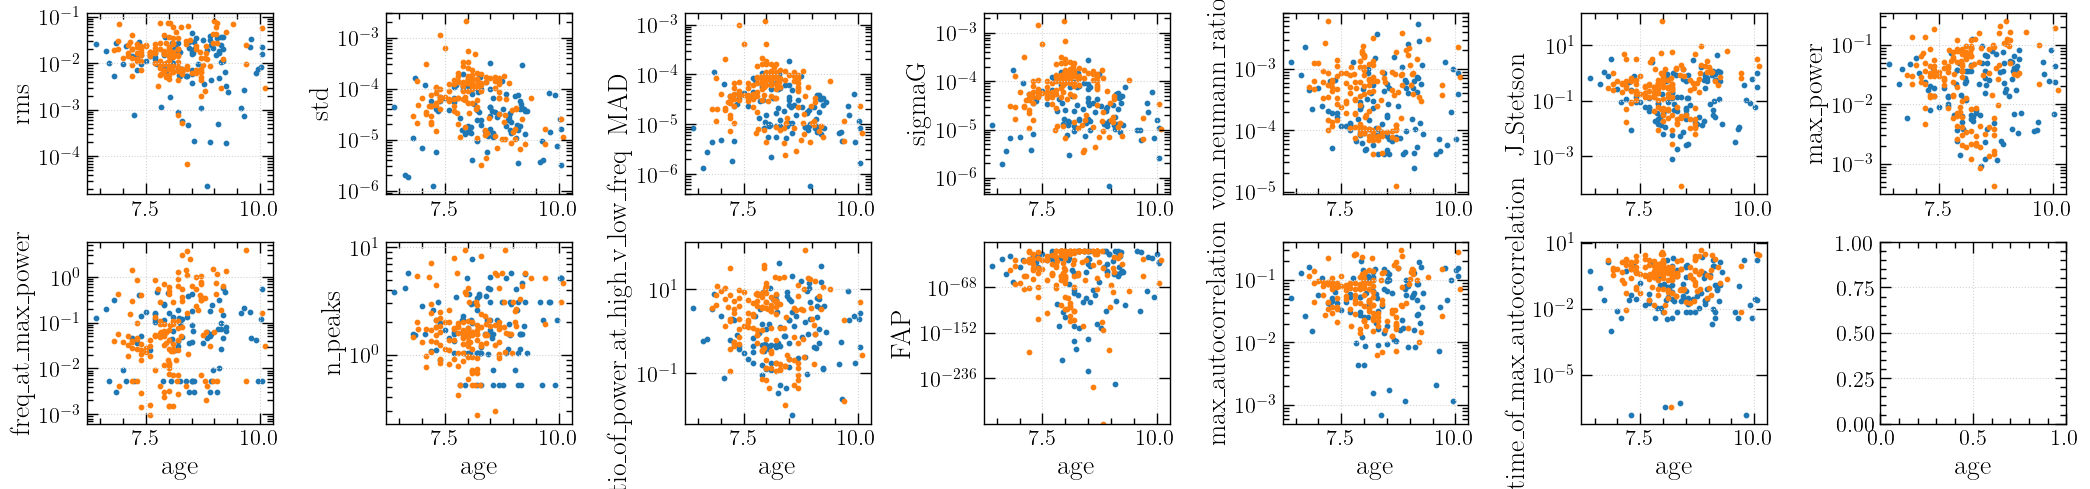

In [14]:
gold_sample = cluster_summary_stats[cluster_summary_stats['gold']==True]
other_sample = cluster_summary_stats[cluster_summary_stats['gold']==False]

row = 0
col = 0
fig,ax = plt.subplots(2,7,figsize=(21,5))
for i in stats:
    
    ax[row][col].scatter(gold_sample['age'],(gold_sample['{}_95'.format(i)] - gold_sample['{}_05'.format(i)]) / np.sqrt(gold_sample['n_rows']),s=10)
    ax[row][col].scatter(other_sample['age'],(other_sample['{}_95'.format(i)] - other_sample['{}_05'.format(i)]) / np.sqrt(other_sample['n_rows']),s=10)
    # ax[col].axhline(y=0.3)
    ax[row][col].set_yscale('log')
    ax[row][col].set_ylabel(i,fontsize=20)
    ax[1][col].set_xlabel('age',fontsize=20)
    col +=1

    if col == 7:
        row +=1
        col = 0
plt.tight_layout()


In [15]:
#looking for variablity sector to sector
#gold sample: viewed 3 times
#small spread across sector
#think about handling numbers of sectors for std
#look at bad sectors (look at median and then wings)




(array([ 3.,  4.,  7.,  8., 23., 22., 12., 18.,  3.,  7.]),
 array([ 6.4  ,  6.765,  7.13 ,  7.495,  7.86 ,  8.225,  8.59 ,  8.955,
         9.32 ,  9.685, 10.05 ]),
 <BarContainer object of 10 artists>)

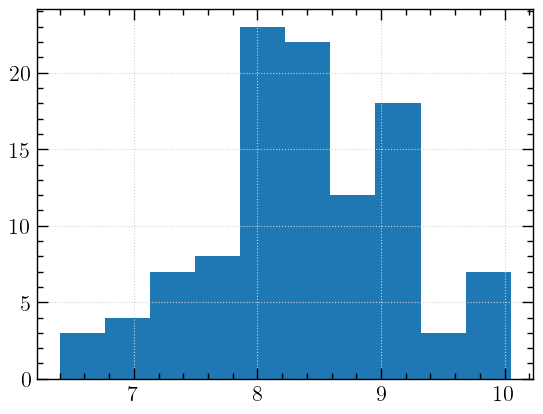

In [16]:
from scipy import stats
np.random.seed(0)
plt.hist(gold_sample['age'])


In [17]:
indices = np.arange(0, len(gold_sample))

temp = []
key = False

count = 0

while(key==False):
    idx = np.random.randint(0, len(indices))
    indices = np.delete(indices,idx)

    temp.append(gold_sample[idx])
    temp_resampled_gold = vstack(temp)

    if len(temp_resampled_gold) >5:
        ks_stats = []
        for i in range(10):
            uniform_age_distribution = np.random.uniform(np.nanmin(temp_resampled_gold['age']),np.nanmax(temp_resampled_gold['age']),len(temp_resampled_gold))
            ks_stat = stats.ks_2samp(temp_resampled_gold['age'], uniform_age_distribution)
            ks_stats.append(ks_stat.pvalue)
        if np.nanmedian(ks_stats) > 0.05:
            resampled_gold = vstack(temp)
        else:
            del temp[-1]
    if len(indices) == 0:
        key = True
        
            
        #     key = True
        #     print(ks_stats)
        # else:
        #     resampled_gold = vstack(temp)
            

    count +=1
    if count > 5000:
        key=True
        print('WARN!!!')
    
    
    

In [18]:
gold_sample

cluster_name,summary_fname,n_rows,snr_05,snr_25,snr_34,snr_50,snr_68,snr_75,snr_95,rms_05,rms_25,rms_34,rms_50,rms_68,rms_75,rms_95,std_05,std_25,std_34,std_50,std_68,std_75,std_95,MAD_05,MAD_25,MAD_34,MAD_50,MAD_68,MAD_75,MAD_95,sigmaG_05,sigmaG_25,sigmaG_34,sigmaG_50,sigmaG_68,sigmaG_75,sigmaG_95,skewness_05,skewness_25,skewness_34,skewness_50,skewness_68,skewness_75,skewness_95,von_neumann_ratio_05,von_neumann_ratio_25,von_neumann_ratio_34,von_neumann_ratio_50,von_neumann_ratio_68,von_neumann_ratio_75,von_neumann_ratio_95,J_Stetson_05,J_Stetson_25,J_Stetson_34,J_Stetson_50,J_Stetson_68,J_Stetson_75,J_Stetson_95,max_power_05,max_power_25,max_power_34,max_power_50,max_power_68,max_power_75,max_power_95,freq_at_max_power_05,freq_at_max_power_25,freq_at_max_power_34,freq_at_max_power_50,freq_at_max_power_68,freq_at_max_power_75,freq_at_max_power_95,n_peaks_05,n_peaks_25,n_peaks_34,n_peaks_50,n_peaks_68,n_peaks_75,n_peaks_95,ratio_of_power_at_high_v_low_freq_05,ratio_of_power_at_high_v_low_freq_25,ratio_of_power_at_high_v_low_freq_34,ratio_of_power_at_high_v_low_freq_50,ratio_of_power_at_high_v_low_freq_68,ratio_of_power_at_high_v_low_freq_75,ratio_of_power_at_high_v_low_freq_95,FAP_05,FAP_25,FAP_34,FAP_50,FAP_68,FAP_75,FAP_95,max_autocorrelation_05,max_autocorrelation_25,max_autocorrelation_34,max_autocorrelation_50,max_autocorrelation_68,max_autocorrelation_75,max_autocorrelation_95,time_of_max_autocorrelation_05,time_of_max_autocorrelation_25,time_of_max_autocorrelation_34,time_of_max_autocorrelation_50,time_of_max_autocorrelation_68,time_of_max_autocorrelation_75,time_of_max_autocorrelation_95,WARN,age,location,gold
bytes47,bytes17,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,str3,bool
hlsp_elk_tess_ffi_ascc-57_tess_v1_llc,ASCC 57,6,4.499013371523371,4.508934257012191,4.510610848544824,4.529924399437492,4.5492890899121,4.550311848773666,4.724901970442808,0.16917797304668825,0.1757370091107514,0.1757370091107514,0.17649078291671053,0.17724455672266964,0.17724455672266964,0.17724455672266964,0.00018497349692133492,0.0001944088362219816,0.00019459533758593822,0.0002047776891953611,0.00021540471531355937,0.00021590259797104586,0.0002172652298654288,0.00012979951818382907,0.0001306576768383555,0.0001320065572023854,0.0001374731219130343,0.00014369157370004438,0.00014513632177087787,0.0001506691762031831,0.00019275913060160202,0.00019490279025691405,0.00019617285820314689,0.00020394182250002446,0.0002132100602606308,0.00021526279751002926,0.00022368758067937533,-46195868.99111818,-32453311.64338492,-26446553.9603738,-20373750.399522964,-9453288.437518006,-1707645.354751681,7165781.769087931,0.0004760163902952144,0.0005773729923840696,0.0006637049731390993,0.0008208350289788877,0.0010597874189007686,0.0011817422833297,0.0032795250484738466,5.462989055187992,5.469521473244269,5.47506521529448,5.691516121246057,6.0477041286734226,6.173207941994027,8.033747213056962,0.06614284892813768,0.09077540288282435,0.12371474396601637,0.151726912855225,0.1654673112526061,0.17219412770411902,0.26541870355176134,0.49250000000000005,0.6500000000000001,0.6500000000000001,0.6500000000000001,0.6540000000000001,0.6575000000000002,0.6900000000000002,6.0,

(array([ 1.,  8.,  2.,  4., 10., 11., 10., 17., 16.,  3.]),
 array([6.7  , 6.996, 7.292, 7.588, 7.884, 8.18 , 8.476, 8.772, 9.068,
        9.364, 9.66 ]),
 <BarContainer object of 10 artists>)

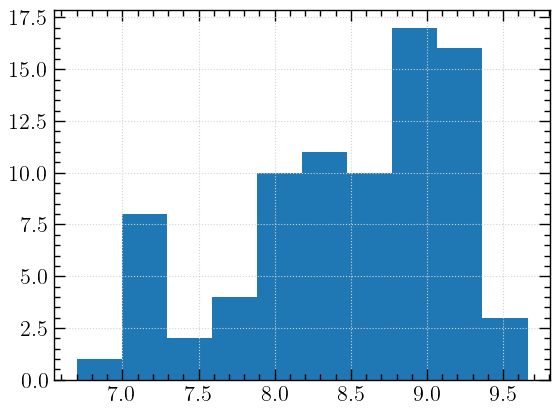

In [23]:
uniform_age_distribution = np.random.uniform(np.nanmin(resampled_gold['age']),np.nanmax(resampled_gold['age']),len(resampled_gold))

plt.figure()
plt.hist(resampled_gold['age'])
# plt.hist(uniform_age_distribution)

In [20]:
ks_stats = stats.ks_2samp(resampled_gold['age'], uniform_age_distribution)
ks_stats

KstestResult(statistic=np.float64(0.25609756097560976), pvalue=np.float64(0.008991166830753808), statistic_location=np.float64(7.821633980842115), statistic_sign=np.int8(-1))

In [21]:
resampled_gold.remove_column('WARN')

In [22]:
gold_sample.write('gold_cluster_sample_stats.fits',overwrite=True)
resampled_gold.write('resampled_gold_cluster_sample_stats.fits',overwrite=True)

In [24]:
gold_sample

cluster_name,summary_fname,n_rows,snr_05,snr_25,snr_34,snr_50,snr_68,snr_75,snr_95,rms_05,rms_25,rms_34,rms_50,rms_68,rms_75,rms_95,std_05,std_25,std_34,std_50,std_68,std_75,std_95,MAD_05,MAD_25,MAD_34,MAD_50,MAD_68,MAD_75,MAD_95,sigmaG_05,sigmaG_25,sigmaG_34,sigmaG_50,sigmaG_68,sigmaG_75,sigmaG_95,skewness_05,skewness_25,skewness_34,skewness_50,skewness_68,skewness_75,skewness_95,von_neumann_ratio_05,von_neumann_ratio_25,von_neumann_ratio_34,von_neumann_ratio_50,von_neumann_ratio_68,von_neumann_ratio_75,von_neumann_ratio_95,J_Stetson_05,J_Stetson_25,J_Stetson_34,J_Stetson_50,J_Stetson_68,J_Stetson_75,J_Stetson_95,max_power_05,max_power_25,max_power_34,max_power_50,max_power_68,max_power_75,max_power_95,freq_at_max_power_05,freq_at_max_power_25,freq_at_max_power_34,freq_at_max_power_50,freq_at_max_power_68,freq_at_max_power_75,freq_at_max_power_95,n_peaks_05,n_peaks_25,n_peaks_34,n_peaks_50,n_peaks_68,n_peaks_75,n_peaks_95,ratio_of_power_at_high_v_low_freq_05,ratio_of_power_at_high_v_low_freq_25,ratio_of_power_at_high_v_low_freq_34,ratio_of_power_at_high_v_low_freq_50,ratio_of_power_at_high_v_low_freq_68,ratio_of_power_at_high_v_low_freq_75,ratio_of_power_at_high_v_low_freq_95,FAP_05,FAP_25,FAP_34,FAP_50,FAP_68,FAP_75,FAP_95,max_autocorrelation_05,max_autocorrelation_25,max_autocorrelation_34,max_autocorrelation_50,max_autocorrelation_68,max_autocorrelation_75,max_autocorrelation_95,time_of_max_autocorrelation_05,time_of_max_autocorrelation_25,time_of_max_autocorrelation_34,time_of_max_autocorrelation_50,time_of_max_autocorrelation_68,time_of_max_autocorrelation_75,time_of_max_autocorrelation_95,WARN,age,location,gold
bytes47,bytes17,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,str3,bool
hlsp_elk_tess_ffi_ascc-57_tess_v1_llc,ASCC 57,6,4.499013371523371,4.508934257012191,4.510610848544824,4.529924399437492,4.5492890899121,4.550311848773666,4.724901970442808,0.16917797304668825,0.1757370091107514,0.1757370091107514,0.17649078291671053,0.17724455672266964,0.17724455672266964,0.17724455672266964,0.00018497349692133492,0.0001944088362219816,0.00019459533758593822,0.0002047776891953611,0.00021540471531355937,0.00021590259797104586,0.0002172652298654288,0.00012979951818382907,0.0001306576768383555,0.0001320065572023854,0.0001374731219130343,0.00014369157370004438,0.00014513632177087787,0.0001506691762031831,0.00019275913060160202,0.00019490279025691405,0.00019617285820314689,0.00020394182250002446,0.0002132100602606308,0.00021526279751002926,0.00022368758067937533,-46195868.99111818,-32453311.64338492,-26446553.9603738,-20373750.399522964,-9453288.437518006,-1707645.354751681,7165781.769087931,0.0004760163902952144,0.0005773729923840696,0.0006637049731390993,0.0008208350289788877,0.0010597874189007686,0.0011817422833297,0.0032795250484738466,5.462989055187992,5.469521473244269,5.47506521529448,5.691516121246057,6.0477041286734226,6.173207941994027,8.033747213056962,0.06614284892813768,0.09077540288282435,0.12371474396601637,0.151726912855225,0.1654673112526061,0.17219412770411902,0.26541870355176134,0.49250000000000005,0.6500000000000001,0.6500000000000001,0.6500000000000001,0.6540000000000001,0.6575000000000002,0.6900000000000002,6.0,